<a href="https://colab.research.google.com/github/Shelly10-10/flood_prediction/blob/main/Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
df=pd.read_csv("improved_flood_dataset.csv")
flood_counts=df['Flood_Reported'].value_counts()
print(flood_counts)

Flood_Reported
0    7136
1    2864
Name: count, dtype: int64


In [6]:
df.head(10)

AttributeError: 'NoneType' object has no attribute 'head'

In [ ]:
#Decision tree
#Random forest
#XG boosting
#FNN
#Tabnet

In [9]:
#Data preprocessing
df['Date']=pd.to_datetime(df['Date'])#converting to datetime
df['Year']=df['Date'].dt.year#extracting year
df['Month']=df['Date'].dt.month#extracting month
df['Day']=df['Date'].dt.day#extracting day
#lambda here is a function which takes x(i.e month) and checks whether the month is monsoon or not
df['is_monsoon']=df['Month'].apply(lambda x: 1 if x in [6,7,8,9] else 0)#checking whether the month is a monsoon month or not

In [11]:
df.drop('Date',axis=1)

,Region,Latitude,Longitude,Rainfall_mm,Tide_Level_m,Soil_Saturation_%,River_Level_m,Land_Elevation_m,Distance_to_Coast_km,Cyclone_Alert,...,Wind_Speed_kmph,Evaporation_mm,Satellite_Cloud_Index,Infrastructure_Grade,Flood_Risk_Score,Flood_Reported,Year,Month,Day,is_monsoon
0,Mumbai,19.07,72.88,185.4,1.06,67,3.88,22.4,1.0,0,...,34.0,2.71,0.64,C,0.424,0,2020,7,22,1
1,Paradip,20.31,86.61,25.1,3.74,3,4.29,5.4,4.3,0,...,27.5,3.70,0.44,A,0.166,0,2022,10,8,0
2,Mangalore,12.91,74.85,42.9,2.34,8,5.37,22.7,5.6,0,...,52.3,5.98,0.68,A,0.042,0,2023,10,20,0
3,Visakhapatnam,17.69,83.22,38.2,1.43,10,2.40,17.8,8.4,0,...,22.3,3.04,0.77,D,0.326,0,2024,10,1,0
4,Tuticorin,8.81,78.13,16.4,1.15,12,1.85,20.9,6.9,1,...,33.7,2.68,0.42,C,0.484,0,2023,12,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Kochi,9.97,76.28,77.8,2.57,51,5.28,19.8,3.5,0,...,53.0,7.12,0.57,B,0.282,0,2021,5,15,0
9996,Tuticorin,8.81,78.13,64.5,0.84,44,3.33,14.0,3.7,0,...,20.5,9.81,0.59,C,0.309,0,2022,2,26,0
9997,Goa,15.30,74.12,84.3,1.83,28,2.56,16.6,2.5,1,...,29.1,4.16,0.82,C,0.625,1,2023,4,23,0
9998,Kolkata,22.57,88.36,106.7,2.93,58,5.21,8.0,7.7,0,...,53.8,8.78,0.72,C,0.495,0,2025,4,28,0


In [12]:
grade_mapping = {
    'A': 5,  # highest protection
    'B': 4,
    'C': 3,
    'D': 2,
    'E': 1   # lowest protection
}

df['Infrastructure_Grade_Encoded'] = df['Infrastructure_Grade'].map(grade_mapping)


In [13]:
df.isnull().sum()


,0
Region,0
Latitude,0
Longitude,0
Date,0
Rainfall_mm,0
Tide_Level_m,0
Soil_Saturation_%,0
River_Level_m,0
Land_Elevation_m,0
Distance_to_Coast_km,0


In [14]:
df.dtypes

,0
Region,object
Latitude,float64
Longitude,float64
Date,datetime64[ns]
Rainfall_mm,float64
Tide_Level_m,float64
Soil_Saturation_%,int64
River_Level_m,float64
Land_Elevation_m,float64
Distance_to_Coast_km,float64


In [47]:
#flood_risk_score is removed since data is leaking(the decision tree model completely depends on flood_risk_score and starts cheating hence in order to make the model depended on various other factors we are removing it)
X=df.drop(['Flood_Reported','Region','Date','Infrastructure_Grade','Day','Year','Month','Flood_Risk_Score'],axis=1)
y=df['Flood_Reported']

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [49]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [50]:
print(X_train.dtypes)

Latitude                        float64
Longitude                       float64
Rainfall_mm                     float64
Tide_Level_m                    float64
Soil_Saturation_%                 int64
River_Level_m                   float64
Land_Elevation_m                float64
Distance_to_Coast_km            float64
Cyclone_Alert                     int64
Temperature_C                   float64
Humidity_%                        int64
Wind_Speed_kmph                 float64
Evaporation_mm                  float64
Satellite_Cloud_Index           float64
is_monsoon                        int64
Infrastructure_Grade_Encoded      int64
dtype: object


In [60]:
#decision tree can handle both numerical and categorical value but scikit learn does not support categorical values for now
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=40,
    min_samples_leaf=20,
    ccp_alpha=0.01,
    random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1277  150]
 [  47  526]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      1427
           1       0.78      0.92      0.84       573

    accuracy                           0.90      2000
   macro avg       0.87      0.91      0.89      2000
weighted avg       0.91      0.90      0.90      2000



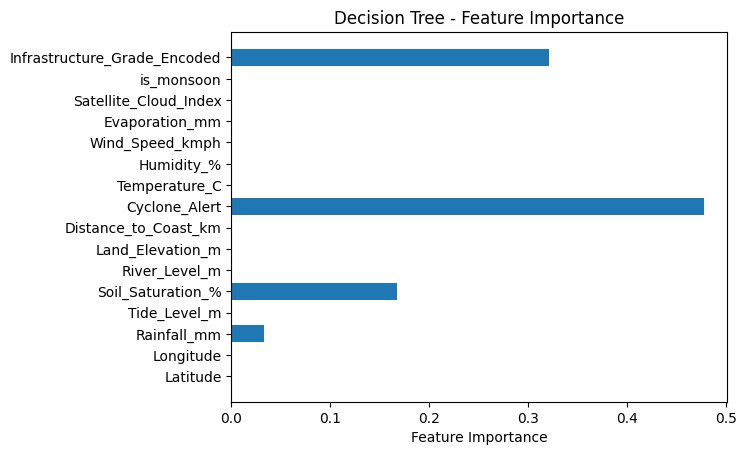

In [61]:
import matplotlib.pyplot as plt

importances = clf.feature_importances_
features = X_train.columns
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Decision Tree - Feature Importance")
plt.show()


In [62]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5)
print("CV Accuracy:", scores.mean())


CV Accuracy: 0.9108


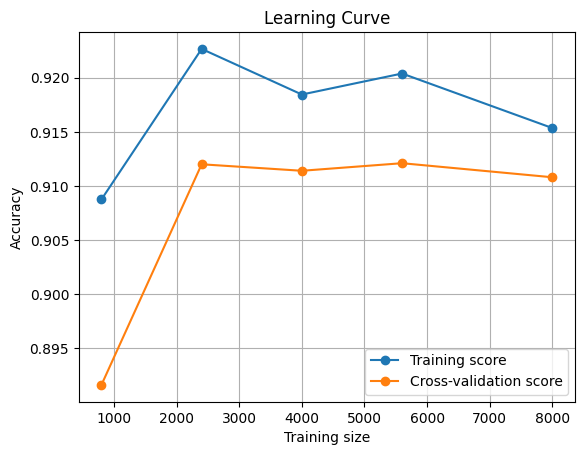

In [63]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    clf, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=[0.1, 0.3, 0.5, 0.7, 1.0]
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation score')
plt.xlabel("Training size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.title("Learning Curve")
plt.show()
